<a href="https://colab.research.google.com/github/ELMehdiNaor/TensorFlow-Developer-Certificate-in-2022-Zero-to-Mastery/blob/main/03_Introduction_to_Computer_Vision_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03.Convolutional Neural Networks and Computer Vision with TensorFlow

so far we have covered the bascis of TensorFlow and built a handful of models to work across different problems. 

Now we are going to get specific and see how a special kind of neural network  **convolutional neural network**(**CNN**) can be used for computer vision (detecting patterns in visual data).


    🔑Note: In Deep Learning, many different kinds of model architectures  can be used for different problems 
    For example, you could use o convolutional neural network for making predictions on image data and/or text data. 
    However, in pratice some architectures typically work better than others.


For example, you might want to: 

- Classify wheter a picture of food contains pizza 🍕 or steak :🥩 (we are going to do this)

- Detect wheter or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In this Notebook, we are going to follow the TensorFlow modelling workflow we have been following so far while learning about how to build and use **CNNs**.

## What we are going to cover 

Specifically, we are going to go through the follow with TensorFlow: 
- Getting a datatset to work with 
- Architecture of a convolutional neural network 
- A quick end-to-end example (what we are working towards)
- Steps in modelling for binary image classification with CNNs 
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model 
  - Improving a model 
  - Making a prediction with a trained model 
- Steps in modelling for multi-class image classification with CNNs 
  - Same as above (but this time with a different dataset)

## How you can use this notebook 
You can read through the descriptions and the code (it should all run, except for the cells which error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code

## Get the data 
Because convolutional neural networks work so well with images, to learn more about them, we are going to start with a datatset of images. 

The images we are going to work with are from the [Food-101 dataset](https://https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000(1000 images per category) real-world images of food dishes. 

To begin, we are only going to use two of the categories, pizza 🍕 and steak :🥩 and build a binary classifier. 

  🔑**Note**: To prepare the data we are using, preprocessing steps such as, moving the images into different subset folders, have been done. 
  To see these preprocessing steps check out the [prepocessing notebook](https://https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

We will download the `pizza_steak` subset .zip file and unzip it.

In [1]:
import zipfile 

# Download zip file of pizza_steak images 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-05-23 20:48:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  50.4MB/s    in 2.1s    

2022-05-23 20:48:57 (50.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you are working with. 

With this being said, let's inspect the data we just downloaded. 

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically: 

- A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class. 

- A `test` directory with the same structure as the `train` directory.

Let's inspect each of the directories we have downloaded. 

To do so, we can use the command `ls` which stands for list.

In [2]:
!ls pizza_steak

test  train


We can see we have got a `train` and `test` folder. 

Let's see what's inside of one of them

In [3]:
!ls pizza_steak/test/

pizza  steak


In [4]:
! ls pizza_steak/train

pizza  steak


And how about what's inside the `steak` directory

In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [7]:
import os 

# Walk through pizza steak directory and list number of files: 
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [8]:
# Another way to find out how many images are in a file 
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [9]:
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))

num_steak_images_test

250

In [10]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib 
import numpy as np 
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Okay, so we have got a collection of 750 training images and 250 testing images of pizza and steak. 

Let's look at some. 


In [11]:
# View an image: 
from matplotlib import pyplot as plt 
from matplotlib import image as mpimg
import random 

def view_random_images(target_dir, target_class):
  # Setup target directory (we will view images from here)
  target_directory = target_dir + target_class 

  # Get a random image path 
  random_image = random.sample(os.listdir(target_directory),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_directory + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape:, {img.shape}") # Display the shape of the image

  return img

Image shape:, (512, 382, 3)


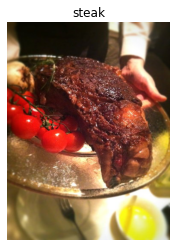

In [12]:
# Let's see if our function works 
# View a random image from the training dataset 
image = view_random_images(target_dir="pizza_steak/test/",
                          target_class="steak")

After going through a dozen or so of these images from the different classes, you can start to get an idea of what we are working with 

The entire Food101 dataset comprises of similar images from 101 different classes. 

You might've noticed, we have been printing the image shape alongside the plotted image. 

This is because the way our computer sees the image (in the form of a big array/tensor)

In [13]:
# View the image: 
image

array([[[ 63,  43,  19],
        [ 62,  42,  18],
        [ 61,  41,  16],
        ...,
        [ 33,  26,  16],
        [ 32,  25,  15],
        [ 32,  25,  17]],

       [[ 62,  42,  18],
        [ 62,  42,  18],
        [ 60,  40,  15],
        ...,
        [ 33,  26,  16],
        [ 32,  25,  15],
        [ 32,  25,  17]],

       [[ 59,  41,  17],
        [ 58,  40,  16],
        [ 57,  40,  14],
        ...,
        [ 33,  26,  16],
        [ 32,  25,  15],
        [ 32,  25,  17]],

       ...,

       [[154, 124,  70],
        [152, 122,  68],
        [149, 119,  65],
        ...,
        [150, 145, 115],
        [137, 131,  99],
        [129, 121,  85]],

       [[157, 128,  72],
        [154, 125,  69],
        [151, 121,  67],
        ...,
        [159, 154, 125],
        [145, 139, 107],
        [135, 129,  93]],

       [[159, 130,  74],
        [157, 128,  72],
        [154, 124,  70],
        ...,
        [165, 160, 131],
        [151, 145, 113],
        [141, 135,  99]]

In [14]:
# View the image shape: 
image.shape, image.dtype

((512, 382, 3), dtype('uint8'))

Looking at the image shape more closely, you'll see it's in the form `(Width, Height, Colour Channels).`

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of[red, green and blue (RGB) pixels.](https://https://en.wikipedia.org/wiki/RGB_color_model) 

You'll notice all of the values in the `image` array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0`, `green=0`, `blue=255` will look very blue.

So when we build a model to differentiate between our images of `pizza` and `steak`, it will be finding patterns in these different pixel values which determine what each class looks like.

🔑 **Note**: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [15]:
# Get all the pixel values between 0 and 1:
norm_image = image/255.0

norm_image.shape, norm_image.dtype, norm_image.min(), norm_image.max()

((512, 382, 3), dtype('float64'), 0.0, 1.0)

## An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the [original datatset authors paper](https://https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d) and averaged 50.76% accuracy at predicting what different foods different images had in them. 

From now on, that 50.76% will be our baseline. 

🔑**Note:** A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates an end-to-end way to model our `pizza_steak` datatset with a convolutional neural network **CNN**. 

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing. 

We will go through each of the steps later on in the notebook. 

For reference, the model we are using replicates **TinyVGG**, the computer vision architecture wich fuels the [CNN explainer webpage](https://https://poloclub.github.io/cnn-explainer/) 

📖**Ressource:** The architecture we are using below is a scaled-down version of [VGG-16](https://https://arxiv.org/abs/1505.06798), a convolutional neural network which came 2nd in the 2014 [ImageNet classification competition](https://https://image-net.org/index.php)

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 205ms/step - loss: 0.5969 - accuracy: 0.6667 - val_loss: 0.4461 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4405 - accuracy: 0.8020 - val_loss: 0.3563 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4060 - accuracy: 0.8227 - val_loss: 0.3293 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3736 - accuracy: 0.8367 - val_loss: 0.4206 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3174 - accuracy: 0.8627 - val_loss: 0.2989 - val_accuracy: 0.8620


Nice after 5 epochs, our model beat the baseline score of 50.76% accuracy
 (our model got ~85% accuracy on the training set and ~ 85% on the test set). 

 However, our model only went through a binary classification problem rather than all of the 101 classes
 in the Food101 dataset, so we can't directly compare these metrics. That being said, the results sa far show
 that our model is learning something.

 

🛠**Practice:** Step through each of the main blocks of code in the cell above, what do you think each is doing? It's okay if you're not sure, we'll go through this soon. In the meantime, spend 10-minutes playing around the incredible[ CNN explainer website](https://https://poloclub.github.io/cnn-explainer/). What do you notice about the layer names at the top of the webpage?

Since we have already fit a model, let's check out its architecture

In [17]:
# Check out the layers in our model: 
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

What do you notice about the names of `model_1`'s layers and the layer names at the top of the [Linktext](https://poloclub.github.io/cnn-explainer/)?

I will let you in on a little secret: we have replicated the exact architecture they use for their model demo. 

Look at you go! **You are already starting to replicate models you find in the wild** 

Now there are a few new things here we have not discussed, namely: 
- The `ImageDataGenerator` class and the `rescale` parameter
- The `flow_from_directory()` method
    - The `batch_size` parameter
    - The `target_size` parameter 
- `Conv2D` layers (and the parameters which come with them)
- `MaxPool2D` layers(and their parameters)
- The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function 

Before we dive into each of these, let's see what happens if we try to fit a model we have worked with previsouly to our data.

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we have previously built might work with our data. 

  🔑**Note:** if you have not gone through the previous classification notebook, no troubles, we will be bringing in the simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

We can use all of the same parameters in our previous model except for changing two things:
- **The data**-we are now working with images instead of dots.
- **The input shape**-we have to tell our neural network the shape of the images we are working with. 
    - A common practice is to reshape images all to one size. In our case, we will resize the images to `(227, 227, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [18]:
import tensorflow as tf
# Set random seed:
tf.random.set_seed(42)

# 1.Create the model: 
model_2 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(224,224,3)), # dense layer expect a 1-dimensional vector as input               
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, name="output_layer")
])

# 2.Compile the model: 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.Fit the model: 
history_2 = model_2.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data),  # 47 steps
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))   # 16 steps

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing. 

Let's take a look at the architecture

In [19]:
# Check out our second model's architecture: 
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 output_layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


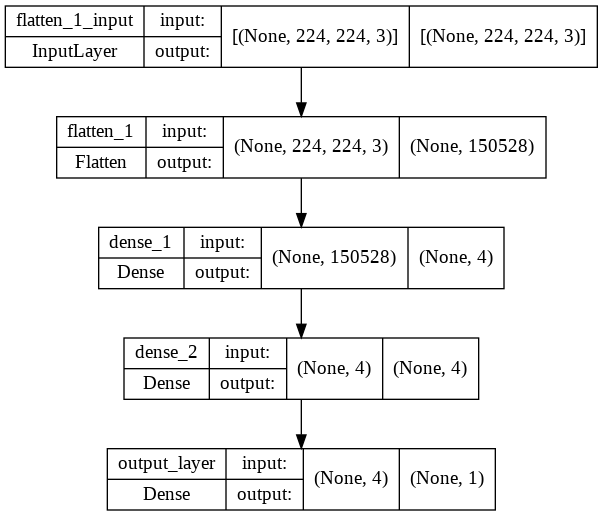

In [20]:
# Plot the model: 
from tensorflow.keras.utils import plot_model
plot_model(model=model_2, show_shapes=True)

Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`. 

`model_2` has 602.141 trainable parameters where as `model_1` has only 31.101. And despite this difference, `model_1` still far and large out performs `model_2`. 

  🔑**Note**: You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And is some cases it is. But in this case, the difference here is in the two different styles of model we are using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patters in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.


Since our previous model did not work, do you have any ideas of how we might make it work? 

How about we increase the number of layers? 

And maybe even increase the number of neurons in each layer?

More specifically, we will increase the number of neurons(also called hidden units) in each dense layer from 4 to 100 and add an extra layer. 

  🔑**Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model. 

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1.Create the model: 
model_3 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(224,224,3)), # converts a 3-D Tensor in the network into a 1-D vector to fit the input of fully-connected layer for classification
          tf.keras.layers.Dense(100, activation="relu", name="hidden_layer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hidden_layer2"), 
          tf.keras.layers.Dense(100, activation="relu", name="hidden_layer3"),
          tf.keras.layers.Dense(1, activation="sigmoid", name="output-layer")
])

# 2.Compile the model: 
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.Fit the model: 
history_3 = model_3.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 2.0440 - accuracy: 0.6320 - val_loss: 0.4726 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 1.3265 - accuracy: 0.6653 - val_loss: 0.5915 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.5391 - accuracy: 0.7640 - val_loss: 0.9947 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.7577 - accuracy: 0.7207 - val_loss: 0.5381 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5202 - accuracy: 0.7773 - val_loss: 0.7187 - val_accuracy: 0.6620


Woah! Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% on the validation set.

How does the architecture look?

In [22]:
# Check out the third model's architecture: 
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 hidden_layer1 (Dense)       (None, 100)               15052900  
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 hidden_layer3 (Dense)       (None, 100)               10100     
                                                                 
 output-layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


My gosh, the number of trainable parameters has increased even more than `model_2`. And even with close to 500x(~15.000.000 vs 31.000) more trainable parameters, `model_3` still doesn't out perform `model_1`. 

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters. 

## Binary Classification: Let's break it down

We just went through a whirlwind of steps: 
- Become one with the data (visualize, visualize, visualize...)
- Preprocess the data (prepare it for a model)
- Create a model (start with a baseline)
- Fit the model 
- Evaluate the model 
- Adjust different parameters and improve the model (try to beat your baseline)
- Repeat until satisfied

Let's step through each.

### 1.Import and become one with the data
Whatever kind of data you are dealing with, it is a good idea to visualize at least 10-100 samples to start building your own mental model of the data. 

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on. 

You can also notice if some of your data is messed up(for example, has the wrong label) and start to consider ways you might go about fixing it.

Make sure you've got the data by uncommenting the cell below

In [23]:
 import zipfile

# # Download zip file of pizza_steak images
 !wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file 
 zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
 zip_ref.extractall()
 zip_ref.close()

--2022-05-23 20:51:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   224MB/s    in 0.5s    

2022-05-23 20:51:34 (224 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



Image shape:, (436, 512, 3)
Image shape:, (512, 512, 3)


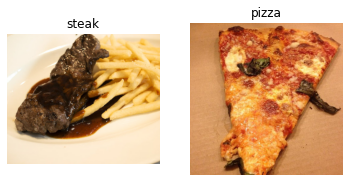

In [24]:
# Visualize data (reqiures function 'view_random_image' above)
plt.figure
plt.subplot(1,2,1)
steak_img = view_random_images("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_images("pizza_steak/train/","pizza")

### 2.Preprocess the data (prepare it for a model)
One of the most important steps for machine learning project is creating a training a training and test set. 

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we will leave that for now. 

For an image classification project, it is standard to have your data separated into `train` and `test` directories with subfolders in each for each class. 

To start we define the training and test directory paths.

In [25]:
# Define training and test directory paths:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10.000 images at one time and trying to figure out out the patterns, a model might only look at 32 images at a time. 

It does this for a couple of reasons: 
- 10.000 images (or more) might not fit into the memory of your processor(GPU)
- Trying to learn the patterns in 10.000 images in one hit could result in the model not being to learn very well. 

Why 32? 

A [batch size of 32 is good for your health](https://https://twitter.com/ylecun/status/989610208497360896?s=20)

No seriously, there are many different batch sizes you could use but 32 has provem to be very effective in many different use cases and is often the default for many data preprocessing functions. 

To turn our data into batches, we will first create an instance of `ImageDataGenerator` for each of our datasets.

In [26]:
# Create train and test data generators and rescale the data: 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model. 

You might have noticed the `rescale` parameter. This one example of the transformations we are doing. 

Remember from before how we imported an image and it's pixel values were between 0 and 255? 

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1). 

  🔑**Note:**For more transformation options such as data augmentation (we will see this later), refer to the `ImageDataGenerator` [documentation.](https://https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

Now we have got a couple of ImageDataGenerator instances, we can load we can load our images from their respective directories using the `flow_from_directory` method.

In [27]:
# Turn into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               target_size=(224,224), 
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224), 
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training datatset has 1500 images belonging to two classes (pizza and steak) and our test datatset has 500 images also belonging to two classes. 

Some things to here: 
- Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`
- The `target_size` parameter defines the input size of our images in `(height, width)` format 
- The `class_mode` value of `binary` defines our classification problem type. If we had more than two classes, we would use `categorical`.
- The `batch_size` defines how many images will be in each batch, we have used 32 which is the same as the default. 

We can take a look at our batched images and labels by inspecting the `train_data` object.

In [28]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the next batch of images/labels
len(images), len(labels)

(32, 32)

Wonderful, it seems our images and labels are in batches of 32. 

Let's see what the images look like.

In [29]:
# Get the first two images: 
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `binary` our labels are either `0` (pizza) or `1` (steak). 

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

##3. Create a model (start with a baseline)

You might be wondering what your default model architecture should be. 

And the truth is, there is many possible answers to this question. 

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models). 

However, to begin with, it is good to start with a smaller model to acquire a baseline result which you try to improve upon. 

  **🔑Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model may have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers. 


In our case, let's take a smaller version of the model that can be found on the [CNN explainer website](https://https://poloclub.github.io/cnn-explainer/) (`model_1` from above) and build a 3 layer convolutional neural network.

In [31]:
# Make the creating of our model a little easier: 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model (this can be our baseline, a 3 layer convolutional Neural Network):
model_4 = Sequential([
  Conv2D(filters=10,
                 kernel_size=3,
                 strides=1,
                 padding='valid',
                 activation="relu",
                 input_shape=(224,224,3)), # Input Layer (specify input shape)
  Conv2D(10, 3, activation="relu", name="hidden_layer1"),
  Conv2D(10,3, activation="relu", name="hidden_layer2"),
  Flatten(), 
  Dense(1, activation="sigmoid", name="output_layer") # Output Layer (specify output shape)                    
])

Great! We have got a simple convolutional neural network architecture ready to go. 

And it follows the typical CNN structure of: 

  Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output 

Let's discuss some of the components of the `Conv2D` layer: 

  - The "`2D`" means our inputs two dimensional(height and width), even though they have 3 colour channels, the convolutions are run on each channel individually. 

  - `filters`- these are the number of "feature extractors" that will be moving over our images.

  - `kernel_size`- the size of our filters, for example, a `kernel_size` of `(3,3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained it will extract.

  - `stride`- the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filer moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time. 

  - `padding`- this can be either '`same`' or '`valid`', '`same`' adds zeros to the outside of the image so the resulting output of the convolutional layer is the same as the input, where as '`valid`' (default) cuts off excess pixels where the `filter` doesn't fit  (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end. 

What is a **feature**? 

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It is important to note that these **features** are not defined by us, instead the model learns them as it applies different filters across the image. 

  📖**Ressources:** for a great demonstration of these in action, be sure to spend some time going through the following: 

  - [CNN Explainer Webpage](https://https://poloclub.github.io/cnn-explainer/)- a great visual overview of many of the concepts we are replicating here with code. 
  - [A guide to convolutional arithmetic for deep learning](https://https://arxiv.org/pdf/1603.07285.pdf)- a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  - For great explanation of padding, see this [Stack Overflow answer](https://https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t/39371113#39371113)

Now our model is ready, let's compile it.

In [33]:
# Compile the model: 
model_4.compile(loss="binary_crossentropy", 
                optimizer=Adam(),
                metrics=["accuracy"])

Since we are working on a binary classification problem (pizza vs. steak), the `loss` function we are using is `binary_crossentropy`, if it was multiclass, we might use something like `categorical_crossentropy`. 

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

##4. Fit a model

Our model is compiled, time to fit it. 

You will motice two new parameters here: 

- `steps_per_epoch`- this is the number of batches a model will go through per epoch, in our case we want out model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32= 1500/32 = ~47steps)

- `validation_steps` - same as above, except fo the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16steps)

In [34]:
# Check lengths of training and test data generators 
len(train_data), len(test_data)

(47, 16)

In [35]:
# Fit the model 
history_4 = model_4.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.8668 - accuracy: 0.7060 - val_loss: 0.4086 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4094 - accuracy: 0.8193 - val_loss: 0.3874 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.2820 - accuracy: 0.8973 - val_loss: 0.4046 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1250 - accuracy: 0.9620 - val_loss: 0.4374 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.0479 - accuracy: 0.9873 - val_loss: 0.5036 - val_accuracy: 0.8200


## 5. Evaluate the model 

Oh yeah! Looks like our model is learning someting. 

Let#s check out it's training curves.

In [36]:
# Plot the training curves: 
import pandas as pd 
df = pd.DataFrame(history_4.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.866764,0.706000,0.408645,0.808
1,0.409412,0.819333,0.387432,0.842
2,0.281973,0.897333,0.404569,0.818
3,0.125005,0.962000,0.437430,0.828
4,0.047913,0.987333,0.503646,0.820


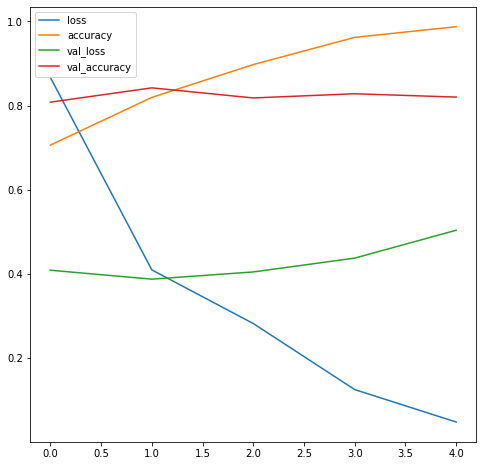

In [37]:
df.plot(figsize=(8,8))

Hmmm, judging by our loss curves, it looks like our model is **overfitting** the training dataset.

  🔑**Note:** when a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [38]:
# Plot the validation and training data separatly
def plot_loss_curves(history): 
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss 
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label="validation loss")
  plt.title('loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label="validation accuracy")
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

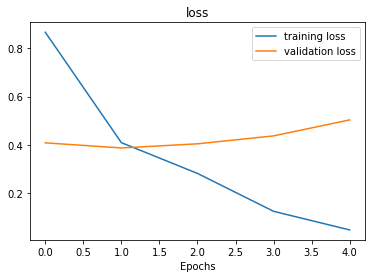

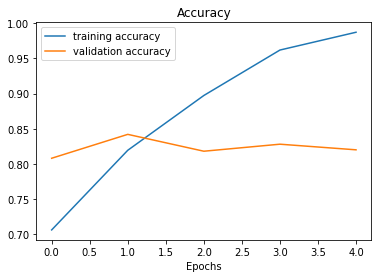

In [39]:
# Check our the loss curves of model_4 
plot_loss_curves(history_4)

The ideal position for these two curves if to follow each other. If anything, the validation curve should be slightly under the training curve.If there is a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [40]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 hidden_layer1 (Conv2D)      (None, 220, 220, 10)      910       
                                                                 
 hidden_layer2 (Conv2D)      (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 output_layer (Dense)        (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


##6. Adjust the model parameters 

Fitting a machine learning model comes in 3 steps: 
1. Create a baseline
2. Beat the baseline by overfitting a larger model 
3. Reduce overfitting 

So far we have gone through steps 1 and 2 

And there are even few more things we could try to further overfit our model: 

- Increase the number of convolutional layers
- Increase the number of convolutional filters
- Add another dense layer to the output of our flattened layer 

But what we will do instead , is focus on getting our model's training curves to better align with eachother, in other words, we will take step 3. 

Why is reducing overfitting important? 

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world. 

Say we were building a pizza vs. steak food classifier app, and our model performs way too well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience? 

Not realy... 

So for the next few models we will build, we are going to adjust a number of parameters and inspect the training curves along the way. 

Namely, we will built two more models: 

- A ConvNet with **max pooling**
- A ConvNet with **max pooling** and **data augmentation**

For the first model, we will follow the modified basic Convolutional Neural Network structure: 

  Input -> Conv layers + ReLu layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output 

Let#s built it.It will have the same structure as `model_4` but with a `MaxPool2D()` layer after each convolutional layer.

In [41]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3), name="input_layer"),
    MaxPool2D(pool_size=2), # reduce the number of features by half
    Conv2D(10, 3, activation="relu", name="hidden_layer1"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu", name="hidden_layer2"),
    MaxPool2D(),
    Flatten(), 
    Dense(1, activation="sigmoid")
])

Woah, we have got another layer type we haven't seen before. 

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features.We will see an example of this in a moment.

In [42]:
# Compile the model (same as model_4): 
model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [43]:
# Fit the model:
history_5 = model_5.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6139 - accuracy: 0.6660 - val_loss: 0.4471 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4522 - accuracy: 0.7940 - val_loss: 0.3989 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4325 - accuracy: 0.8153 - val_loss: 0.3785 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4010 - accuracy: 0.8220 - val_loss: 0.3470 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3844 - accuracy: 0.8313 - val_loss: 0.3468 - val_accuracy: 0.8420


Okay, it looks like our model with max pooling 'model_5' is performing worse on the the training set but better on the validation set. 

Before we checkout its training curves, let's check out its architecture.

In [44]:
# Check out the model architecture 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 hidden_layer1 (Conv2D)      (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 hidden_layer2 (Conv2D)      (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Do you notice what is going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest". 

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything. 

The results of this pooling are seen in a major reduction of total trainable parameters (8.861 in `model_5` and 477.431 in `model_4`).

Time to check out the loss curves.

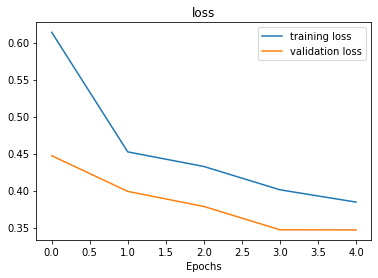

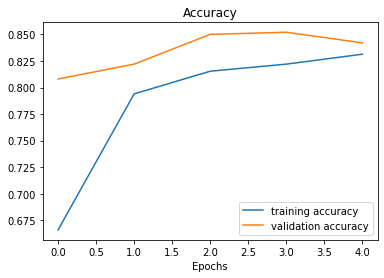

In [45]:
# Plot learning curves of model_5: 
plot_loss_curves(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our validation loss starts inceasing towards the end and in turn potentially leading to overfitting. 

Time to dig into our bag of tricks and try another method of overfitting prevention, **data augmentation**. 

First, we will see how it's done with code then we will discuss what it's doing. 

To implement data augmentation, we will have to reinstantiate our `ImageDataGenerator` instances

In [46]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255, 
                                             rotation_range=20,      # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2,        # shear the image
                                             zoom_range=0.2,         # zoom into the image
                                             width_shift_range=0.2,  # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True)   # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

  🤔**Question:** What's dat augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it  something similar. 

Doing this simulates the kind of data a model might use in the real world. 

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

🔑 **Note**: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [47]:
# Import data and augment it from training directory  
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non augmented data batches 
print("Non augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes


print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Better thank talk about data augmentation, how about we see it? 

(remember our motto? visualize, visualize, visualize...)


In [48]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels are not augmented, they stay the same

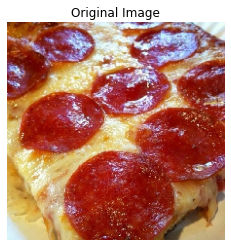

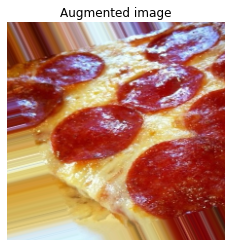

In [49]:
# Show original image and augmented image 
random_number = random.randint(0, 32)  # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images. 

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-word images. 

  🤔**Questions:** Should i use data augmentation? And how much should i augment? 

Data augmentation is a way to try and prevent a model from overfitting. If your model is overfitting (e.g. the validation loss keeps increasing), you may want to try using data augmentation. 

As for how much data to augment, there is no set practice for this. Best to check out the options in the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation. 

Now we have got augmented data, let's try and refit a model on it and see how it affects training. 

We will use the samle model as `model_5`.

In [50]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)), 
  MaxPool2D(pool_size=2), # reduce the number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')                      
])

# Compile the model: 
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [51]:
# Fit the model 
history_6 = model_6.fit(train_data_augmented,
                       epochs = 5, 
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 464ms/step - loss: 0.7211 - accuracy: 0.4093 - val_loss: 0.6890 - val_accuracy: 0.5920
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6897 - accuracy: 0.5820 - val_loss: 0.6714 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6766 - accuracy: 0.5947 - val_loss: 0.6126 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6553 - accuracy: 0.7053 - val_loss: 0.6328 - val_accuracy: 0.5960
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6297 - accuracy: 0.6847 - val_loss: 0.4991 - val_accuracy: 0.8200


  🤔**Question:** Why didn't our model get very good results on the training set to begin with?

It is because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time. 

For example, the pizza class gets loaded in firt because it's the first class. Thus it's peformance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data. 

Since we only set `shuffle=False` for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting `shuffle=True` on future data generators 

You may have also moticed each epoch taking longer when training with augmented data compared to training with non-augmented data (~25s per epoch vs. 10~s per epoch).

This is because the `ImageDataGenerator` instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in. 

  🔑**Note:** One possible method to speed up datatset manipulation would be to look into   


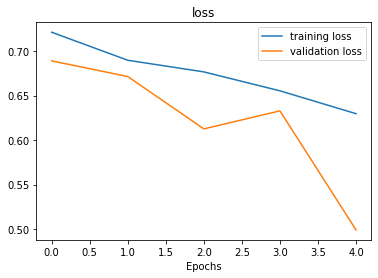

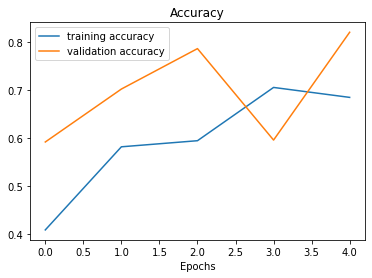

In [52]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

It seems our validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale). 

Let's see what happens when whe shuffle the augmented training data.

In [53]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          batch_size=32,
                                                                          class_mode='binary',
                                                                          shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [54]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
          Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
          MaxPool2D(pool_size=2),
          Conv2D(10, 3, activation='relu'), 
          MaxPool2D(), 
          Conv2D(10, 2, activation='relu'),
          MaxPool2D(),
          Flatten(), 
          Dense(1, activation='sigmoid')
])

In [55]:
# Compile the model: 
model_7.compile(loss='binary_crossentropy', 
                optimizer = Adam(), 
                metrics=['accuracy'])

In [56]:
# Fit the model:
history_7 = model_7.fit(train_data_augmented_shuffled, 
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6446 - accuracy: 0.6233 - val_loss: 0.5595 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5435 - accuracy: 0.7273 - val_loss: 0.3883 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4977 - accuracy: 0.7520 - val_loss: 0.3656 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.4577 - accuracy: 0.7833 - val_loss: 0.3533 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4725 - accuracy: 0.7993 - val_loss: 0.3631 - val_accuracy: 0.8380


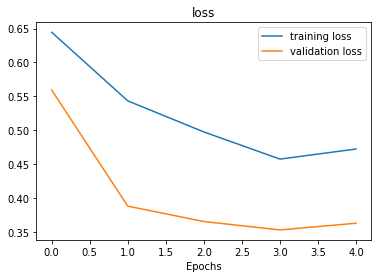

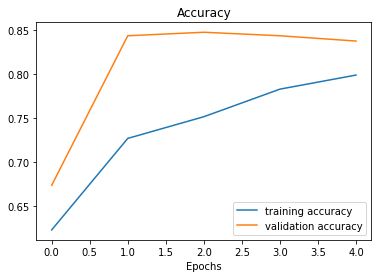

In [57]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

Notice with 'model_7' how the performance on the training dataset improves almost immediatly compared to *model_6*. This is because whe shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method. 

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind. 

Also, our loss curves look a little bit smotther with shuffle data (comparing `history_6` to `history_7`).

## 7. Repeate until satisfied 

We have trained a few models on our dataset already and so far they are performing pretty good. 

Since we have already beaten our baseline, there a a few things we could try to continue to improve our model: 

- Increase the number of model layers (e.g. add more convolutional layers)
- Increase the number of filters in each concolutional layer (e.g. from 10 to 32, 64, 128, these number are not set in stones either, they are usually found through trial and error)
- Train for longer (more epochs)
- Finding an ideal learning rate
- Get more data (give the model more opportunities to learn)
- Use **transfer learning** to leverage what another image model has learned and adjust it for our own case 

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**. 

You can think of hyperparameter tuning as similar to adjusting the settings on your oven to cook your favourite dish. Although your oden does most of the cooking for you, you can help it by tweaking the dials. 

Let's go back to right where we started and try our original model (`model_1`)

In [58]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  Conv2D(10, 3, activation='relu'),          
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [59]:
# Compile the model: 
model_8.compile(loss='binary_crossentropy', 
                optimizer=Adam(),
                metrics=['accuracy'])

In [60]:
# Fit the model: 
history_9 = model_8.fit(train_data_augmented_shuffled,
                        epochs = 5, 
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 476ms/step - loss: 0.6638 - accuracy: 0.5653 - val_loss: 0.5468 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5508 - accuracy: 0.7300 - val_loss: 0.3997 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.5049 - accuracy: 0.7687 - val_loss: 0.3632 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.4830 - accuracy: 0.7727 - val_loss: 0.3359 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4758 - accuracy: 0.7707 - val_loss: 0.3620 - val_accuracy: 0.8320


In [61]:
# Check Model_1 architecture (same as mdodel_8):
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [62]:
# Checl model_8 architecture: 
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

Now let's check out our model's performance

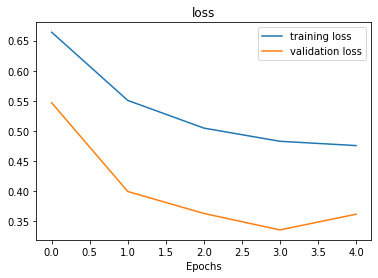

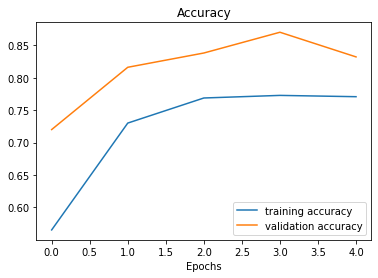

In [63]:
# Plot the model#s performance: 
plot_loss_curves(history_9)

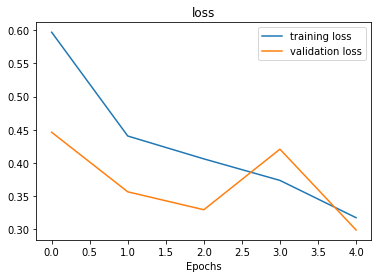

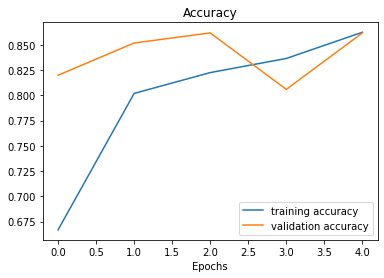

In [64]:
# How does this training curve look compared to the one above: 
plot_loss_curves(history_1)

Hmm, our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

Perhaps that's something you like to try?

## Making a prediction with our trained model 

What good is a trained model if you can't make predictions with it?

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.

In [65]:
# Classes we are working with: 
print(class_names)

['pizza' 'steak']


The first test image we are going to use is a delicious steak.

--2022-05-23 20:59:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-05-23 20:59:21 (48.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

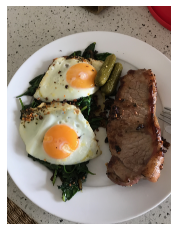

In [66]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [67]:
# Check the shape of our image: 
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

🔑 **Note**: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [68]:
# Create a function to import an resite it to be able to be used with our model. 
def load_and_prep_image(filename, img_shape=224): 
  """
  Reads an image from filename, turns it into a tensor 
  and reshapes it to (img_shape, img_shape, colour channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all the values between 0 and 1)
  img = img/255. 
  
  return img

Now we have got a function to load our custom image, let's load it in.

In [69]:
# Load in and preprocesses our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Wonderful, our image is in tensor format, time to try it with our model !

In [70]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8(steak)

ValueError: ignored

There is one more problem....

Although our image is in the same shapes as the images our model has been trained on, we are still missing a dimension. 

Remember how our model was trained in batches? 

So in reality, our model was trained on data in the shape of (`batch_size, 224, 224, 3`). 

We can fix this by adding an extra to our custom image tensor using `tf.expand_dims`.

In [71]:
# Add an extra axis 
print(f"Shape before new dimension: {steak.shape})")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension:{steak.shape}")

Shape before new dimension: (224, 224, 3))
Shape after new dimension:(1, 224, 224, 3)


Our custom image has a batch size of 1! Let's make a prediction on it.

In [72]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

array([[0.6890235]], dtype=float32)

Ahh, the predictions comes out in **predictiob probability** form. In other words, this means how likely the image is to be one class or another. 

Since we are working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the **positive class** (class 1). 

And if the prediction probability is under 0.5, according to the model, the predicted class is most liekly to be the **negative class** (class 0).

🔑 **Note:**The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [74]:
# Remind ourselves of our class names 
print(f"The class names are:{class_names}")

The class names are:['pizza' 'steak']


In [75]:
# we can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [76]:
def pred_and_plot(model, filename, class_names): 
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction 
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

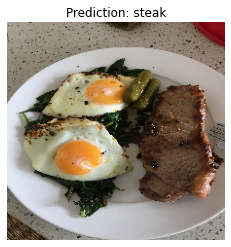

In [77]:
# Test our model on a custom image: 
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Nice ! Our model got the prediction right. 

The only downside of working with food is this is making me hungry 

Let's try one more image.

--2022-05-23 21:00:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.009s  

2022-05-23 21:00:30 (316 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



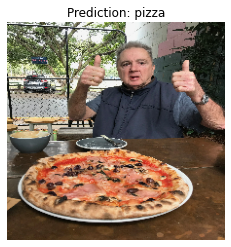

In [78]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

Two thumbs up! Woohooo! 

## Multi-class Classification 

we have referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classesm where as our current model only works with two classes (pizza and steak)

🛠**Practive:** before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem. 

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier? 

How about we go through those steps again, except this time, we will work with 10 different types of food. 

1-Become one with the data (visualize, visualize, visualize...)

2-Preprocess the data (prepare it for a model)

3-Create a model (start with a baseline)

4-Fit the model

5-Evaluate the model

6- Adjust different parameters and improve the model (try to beat our baseline)

7- Repeat until satisfied

###1. Import and become one with the data 

Again, we have got a subset of the [Food101 dataset](https://https://www.kaggle.com/dansbecker/food-101). In addition to the pizza and steak images, we have pulled out another eight classes. 


In [79]:
import zipfile 

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-23 21:00:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  49.9MB/s    in 11s     

2022-05-23 21:00:48 (45.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now let's check out all of the different directories and sub-directories in the `10_food_classes` file.

In [80]:
import os 

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

Looking good! 

We will now setup the training and test directory paths.

In [81]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And get the class names from the subdirectories.

In [82]:
# Get the class names for our multi-class dataset
import pathlib 
import numpy as np 
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


How about we visualize an image from the training set?



Image shape:, (384, 512, 3)


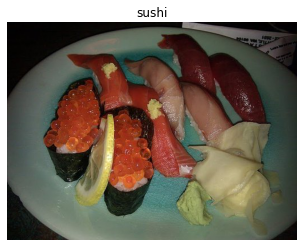

In [84]:
# View a random image from the training dataset
import random 
img = view_random_images(target_dir = train_dir, 
                        target_class = random.choice(class_names)) # get a random class name

###2. Preprocess the data (prepare it for a model)

After going through a handful of images (it's good to visualize at least 10-100 different examples), it looks like our data directories are setup correctly. 

Time to preprocess the data.

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                              target_size=(224,224), 
                                              batch_size=32, 
                                              class_mode = 'categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classification, we have created image generators. The main change this time is that we have changed the `class_mode` parameter to `categorical` because we are dealing with 10 classes of food images. 

Everything else like rescaling the images, creating the batch size and target image size stay the same. 

🤔**Question:** Why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images

###3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks. 

Namely: 

- Changing the output layerto use 10 output neurons (The same number as the number of classes we have). 

- Changing the output layer to use `softmax` activation instead of 'sigmoid' activation

- Changing the loss function to be `categorical_crossentropy` instead of `binary_crossentropy`

In [94]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import Adam

# Create our model (a clode model_8, except to be multi-class)
model_9 = Sequential([
          Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
          Conv2D(10, 3, activation="relu"),
          MaxPool2D(),
          Conv2D(10, 3, activation="relu"),
          Conv2D(10, 3, activation="relu"),
          MaxPool2D(),
          Flatten(),
          Dense(10, activation="softmax") # changed to have 10 neurons (same as number of classes) and softmax activation
])

In [95]:
# Compile the model 
model_9.compile(loss = "categorical_crossentropy", # changed to categorical_crossentropy
                optimizer = Adam(), 
                metrics = ["accuracy"])

In [97]:
# Fit the model 
history_10 = model_9.fit(train_data,
                         epochs = 5, 
                         steps_per_epoch = len(train_data),
                         validation_data = test_data, 
                         validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 191ms/step - loss: 2.1703 - accuracy: 0.2088 - val_loss: 1.9661 - val_accuracy: 0.3048
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.8617 - accuracy: 0.3509 - val_loss: 1.8644 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.5491 - accuracy: 0.4859 - val_loss: 1.8744 - val_accuracy: 0.3636
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 1.0534 - accuracy: 0.6575 - val_loss: 2.2009 - val_accuracy: 0.3184
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.4902 - accuracy: 0.8495 - val_loss: 3.0507 - val_accuracy: 0.2756


Who do you think each epoch takes longer than when working with only two classes of images? 

It is because we are now dealing with more images than we were before. We have got 10 classes with 750 training images and 250 validation images each totaling 10.000 images. Where as when we had two classesm we had 1500 training images and 500 validation images totaling 2000. 

The intuitive reasoning here is the more data you have, the longer the model will take to find patters.

### 5. Evaluate the model

In [99]:
# Evaluate the model on test data: 
model_9.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 3.0507 - accuracy: 0.2756


[3.0506515502929688, 0.27559998631477356]

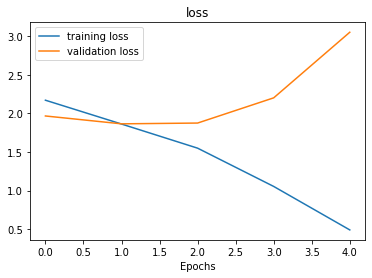

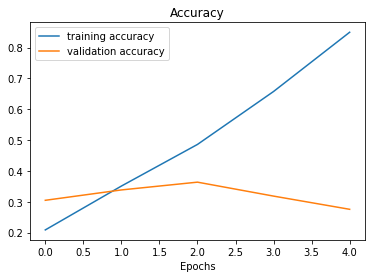

In [100]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_10)

Woah, that's quite the gap between the training and validation loss curves. 

What does this tell us? 

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to genaralize well to unseen data and performs poorly on the test data.

###6. Adjust the model parameters 



Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroombut failing to use your skills in real life.

Ideally, we would like our model to perform as well on the test data as it does on the training data. 

So our next steps will be to try and prevent our model from **overfitting**. A couple of ways to prevent overfitting include: 

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples. 

- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and is not able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer. 

- **Use data augmentation** - Data augmentation manipulates the training data in a way sa that's harder for the model to lean as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data. 

- **User transfer learning** - Transfer learning involves leveraging the patterns (also called pretrained weights), one model has learned to use as the foundation fo your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more speciliazed for food images. 

🔑**Note:** Preventing overfitting is also referred to as **regularization**. 

If you have already got an existing dataset, you are probably most likely to try one or a combination of the last three above options first. 

Since collectiong more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook. 

How about we simplify our model first? 

To do so, we will remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [101]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
          Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
          MaxPool2D(),
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(),
          Flatten(),
          Dense(10, activation="softmax")       
])

In [107]:
# Compile the model: 
model_10.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics=['accuracy'])

In [108]:
# Fit the model: 
history_11 = model_10.fit(train_data, 
                          epochs =5, 
                          steps_per_epoch = len(train_data), 
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.1766 - accuracy: 0.2301 - val_loss: 1.9632 - val_accuracy: 0.3088
Epoch 2/5
235/235 [==============================] - 42s 179ms/step - loss: 1.7354 - accuracy: 0.4029 - val_loss: 1.8856 - val_accuracy: 0.3408
Epoch 3/5
235/235 [==============================] - 42s 181ms/step - loss: 1.3425 - accuracy: 0.5641 - val_loss: 2.0466 - val_accuracy: 0.3164
Epoch 4/5
235/235 [==============================] - 42s 181ms/step - loss: 0.8841 - accuracy: 0.7311 - val_loss: 2.2867 - val_accuracy: 0.3024
Epoch 5/5
235/235 [==============================] - 42s 181ms/step - loss: 0.4958 - accuracy: 0.8628 - val_loss: 2.7497 - val_accuracy: 0.2828


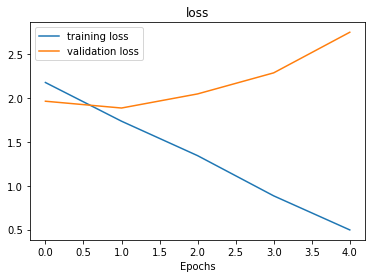

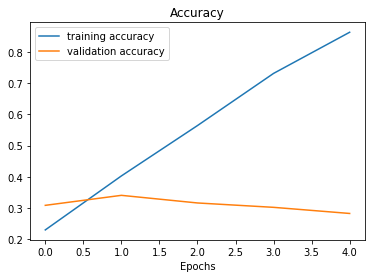

In [109]:
# Check out the loss curve of model_10 
plot_loss_curves(history_11)

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about data augmentation?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new ImageDataGenerator instance, this time adding some parameters such as rotation_range and horizontal_flip to manipulate our images

In [111]:
# Create augmented data generator instance 
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range = 20, 
                                            width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (model_10).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

🔑**Note**: One of the key practices in deep learning and machine learning in general is to be a serial experimenter. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [112]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_12 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 457ms/step - loss: 2.3030 - accuracy: 0.1579 - val_loss: 2.1946 - val_accuracy: 0.2200
Epoch 2/5
235/235 [==============================] - 107s 455ms/step - loss: 2.0994 - accuracy: 0.2485 - val_loss: 1.9610 - val_accuracy: 0.3000
Epoch 3/5
235/235 [==============================] - 107s 455ms/step - loss: 2.0333 - accuracy: 0.2751 - val_loss: 1.9007 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 108s 458ms/step - loss: 1.9960 - accuracy: 0.2993 - val_loss: 1.8439 - val_accuracy: 0.3676
Epoch 5/5
235/235 [==============================] - 107s 455ms/step - loss: 1.9467 - accuracy: 0.3243 - val_loss: 1.8050 - val_accuracy: 0.3828


You can see it each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.

How do our model's training curves look?

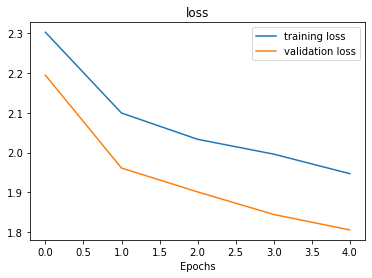

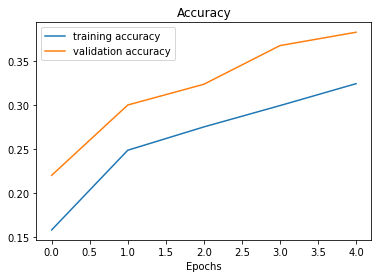

In [115]:
# Check out our model's performance with augmented data
plot_loss_curves(history_12)

Woah! That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

###7. Repaeat unstil satisfied 

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

## Making a prediction with our trained model 

What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [116]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Beautiful, now let's get some of our custom images.

If you're using Google Colab, you could also upload some of your own images via the files tab.

In [117]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Okay, we've got some custom images to try, let's use the pred_and_plot function to make a prediction with model_11 on one of the images and plot it.

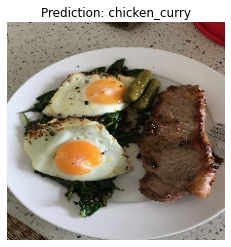

In [118]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

Hmm... it looks like our model got the prediction wrong, how about we try another?

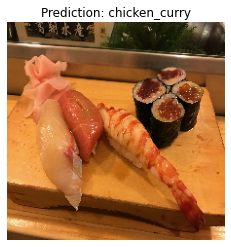

In [119]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

And again, it's predicting chicken_curry for some reason.

How about one more

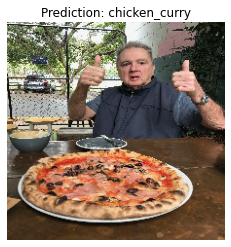

In [120]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

chicken_curry again? There must be something wrong...

I think it might have to do with our pred_and_plot function.

Let's makes a prediction without using the function and see where it might be going wrong.

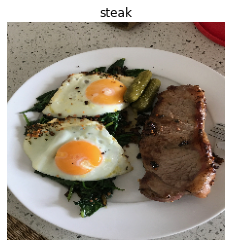

In [121]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

Much better! There must be something up with our pred_and_plot function.

And I think I know what it is.

The pred_and_plot function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the predict function

In [122]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.03096023, 0.01242879, 0.0603621 , 0.1336414 , 0.08461698,
        0.04318063, 0.02649819, 0.16007079, 0.34542456, 0.10281634]],
      dtype=float32)

Since our model has a 'softmax' activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using argmax and then use that to index our class_names list to output the predicted class.

In [123]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

Knowing this, we can readjust our pred_and_plot function to work with multiple classes as well as binary classes.



In [124]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Let's try it out. If we've done it right, using different images should lead to different outputs,



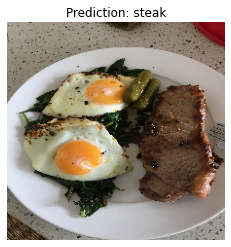

In [125]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)


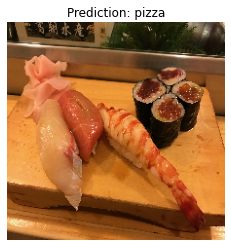

In [126]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)


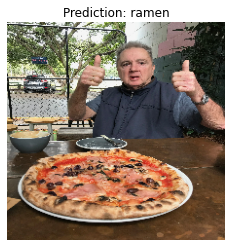

In [127]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)


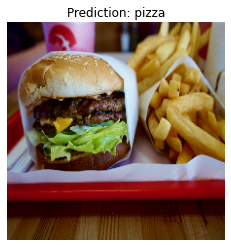

In [128]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)


Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

## Saving and loading our model

Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the save and load_model functions

In [129]:
# Save a model
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [130]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8050 - accuracy: 0.3828


[1.8049989938735962, 0.38280001282691956]

In [132]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.8050 - accuracy: 0.3828


[1.8049994707107544, 0.38280001282691956]